In [14]:
import seaborn as sns
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport data
%aimport tf_deep

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
X, Y = data.sample_gmm_2d(5, 2, 10)
model = LogisticRegression(C=1e5)
model.fit(X, Y.ravel())

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

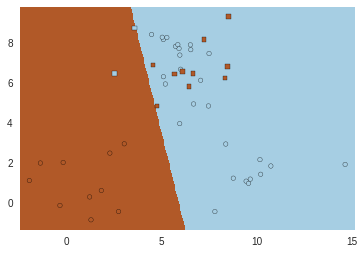

In [35]:
data.graph_data_pred(X, Y, model)

In [27]:
X, Y = data.sample_gmm_2d(4, 2, 40)
oh = OneHotEncoder(sparse=False)
oh.fit(Y)
Yoh = oh.transform(Y)

             precision    recall  f1-score   support

          0       0.88      0.90      0.89       120
          1       0.68      0.62      0.65        40

avg / total       0.83      0.83      0.83       160

confusion matrix
 [[108  12]
 [ 15  25]]


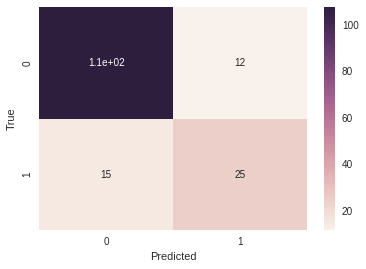

In [28]:
l = [2,2]
tflr = tf_deep.TFDeep(l, 0.001)
tflr.train(X, Yoh, 10000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

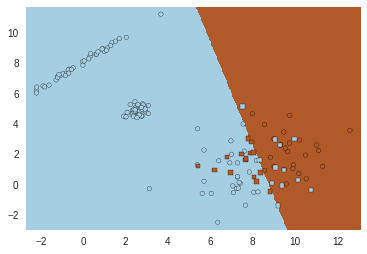

In [29]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

             precision    recall  f1-score   support

          0       0.92      0.90      0.91       120
          1       0.72      0.78      0.75        40

avg / total       0.87      0.87      0.87       160

confusion matrix
 [[108  12]
 [  9  31]]


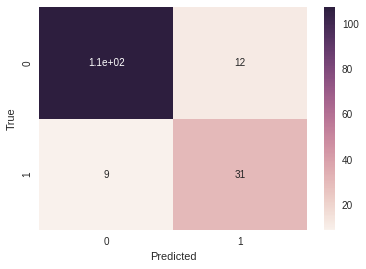

In [34]:
l = [2,10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

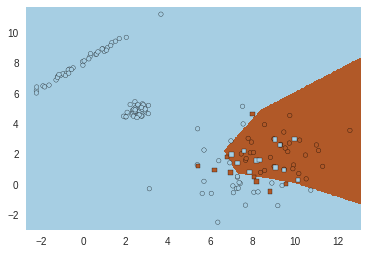

In [35]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

             precision    recall  f1-score   support

          0       0.93      0.90      0.92       120
          1       0.73      0.80      0.76        40

avg / total       0.88      0.88      0.88       160

confusion matrix
 [[108  12]
 [  8  32]]


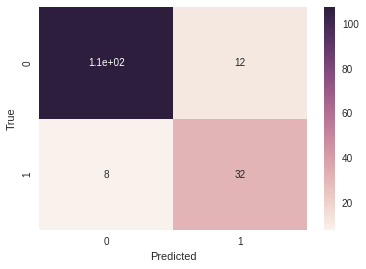

In [32]:
l = [2,10, 10, 2]
tflr = tf_deep.TFDeep(l, 0.001)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

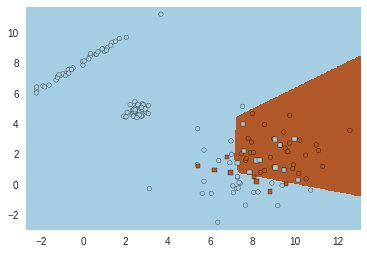

In [33]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

# 5.3.b

In [4]:
X, Y = data.sample_gmm_2d(6, 2, 10)
oh = OneHotEncoder(sparse=False)
oh.fit(Y)
Yoh = oh.transform(Y)

             precision    recall  f1-score   support

          0       0.45      1.00      0.62        20
          1       1.00      0.40      0.57        40

avg / total       0.82      0.60      0.59        60

confusion matrix
 [[20  0]
 [24 16]]


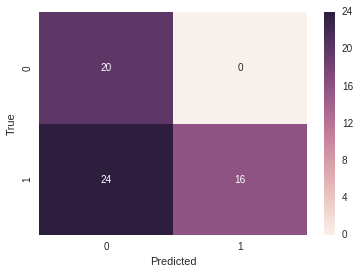

In [21]:
l = [2,2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

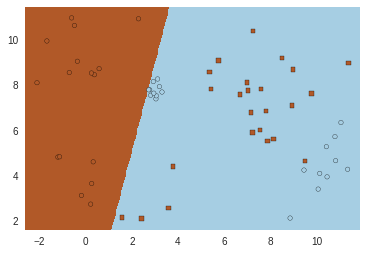

In [22]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

/usr/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      1.00      1.00        40

avg / total       1.00      1.00      1.00        60

confusion matrix
 [[20  0]
 [ 0 40]]


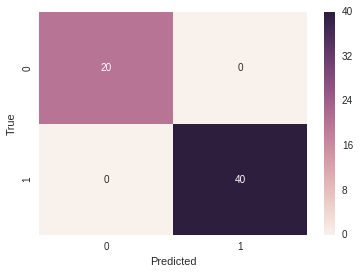

In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
clf.fit(X, Y)
ypp = clf.predict(X)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

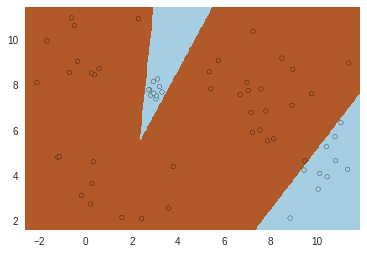

In [11]:
data.graph_data_pred(X, Y, clf)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      1.00      1.00        40

avg / total       1.00      1.00      1.00        60

confusion matrix
 [[20  0]
 [ 0 40]]


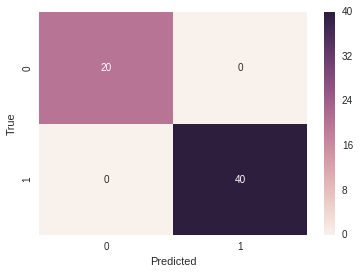

In [15]:
l = [2,10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

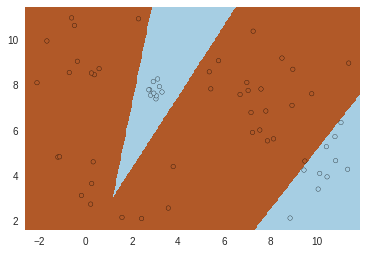

In [16]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00      0.97      0.99        40

avg / total       0.98      0.98      0.98        60

confusion matrix
 [[20  0]
 [ 1 39]]


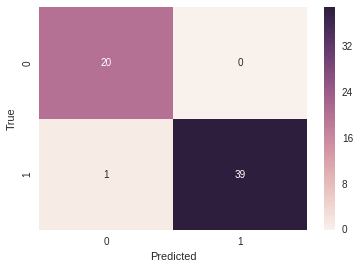

In [17]:
l = [2,10, 10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

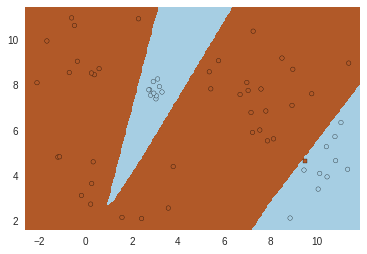

In [18]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()